#**📈 Linear Regression**
**🎯 Goal: Predict Marks based on Study Hours**

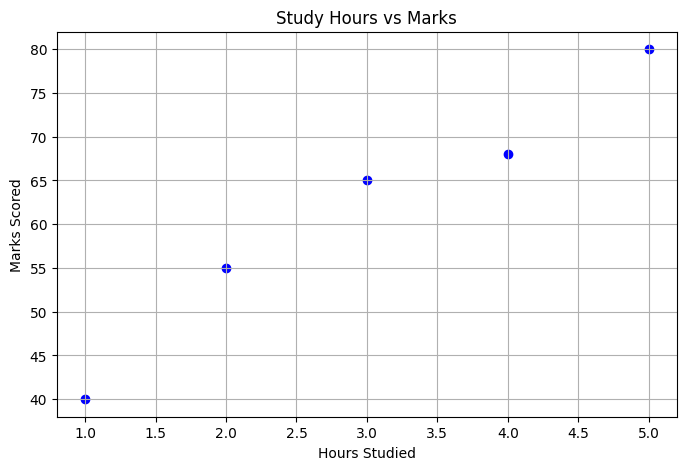

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
data = {"Hours": [1, 2, 3, 4, 5], "Marks": [40, 55, 65, 68, 80]}
df = pd.DataFrame(data)

# Visualize the data
plt.figure(figsize=(8,5))
plt.scatter(df["Hours"], df["Marks"], color='blue')
plt.title("Study Hours vs Marks")
plt.xlabel("Hours Studied")
plt.ylabel("Marks Scored")
plt.grid(True)
plt.show()

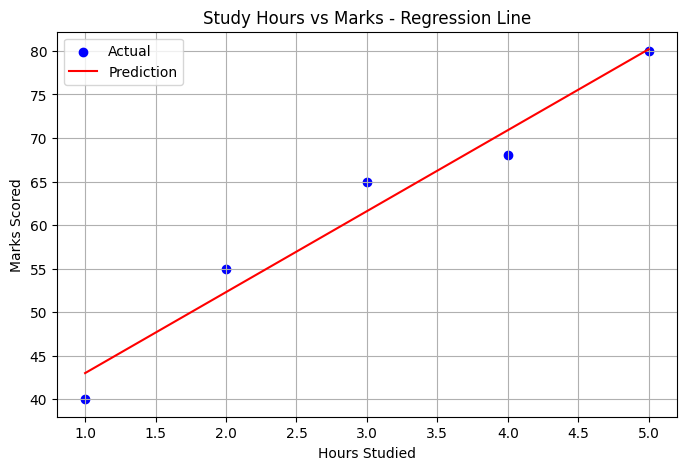

In [8]:
model = LinearRegression()
model.fit(df[["Hours"]], df["Marks"])

# Plot the line
plt.figure(figsize=(8,5))
plt.scatter(df["Hours"], df["Marks"], color='blue', label='Actual')
plt.plot(df["Hours"], model.predict(df[["Hours"]]), color='red', label='Prediction')
plt.title("Study Hours vs Marks - Regression Line")
plt.xlabel("Hours Studied")
plt.ylabel("Marks Scored")
plt.legend()
plt.grid(True)
plt.show()


# **🧪 Classification**
**🎯 Goal: Predict if someone passed based on marks (0 = Fail, 1 = Pass)**

In [15]:
import pandas as pd
import numpy as np

np.random.seed(42)

n = 100
hours = np.random.normal(5, 2, n).clip(0, 10)
attendance = np.random.normal(80, 10, n).clip(50, 100)


labels = (hours > 6) & (attendance > 85)
pass_status = labels.astype(int)

df = pd.DataFrame({
    "Study Hours": hours,
    "Attendance (%)": attendance,
    "Pass": pass_status
})
df.head()


Study Hours  Attendance (%)  Pass
0     5.993428       65.846293     0
1     4.723471       75.793547     0
2     6.295377       76.572855     0
3     8.046060       71.977227     0
4     4.531693       78.387143     0

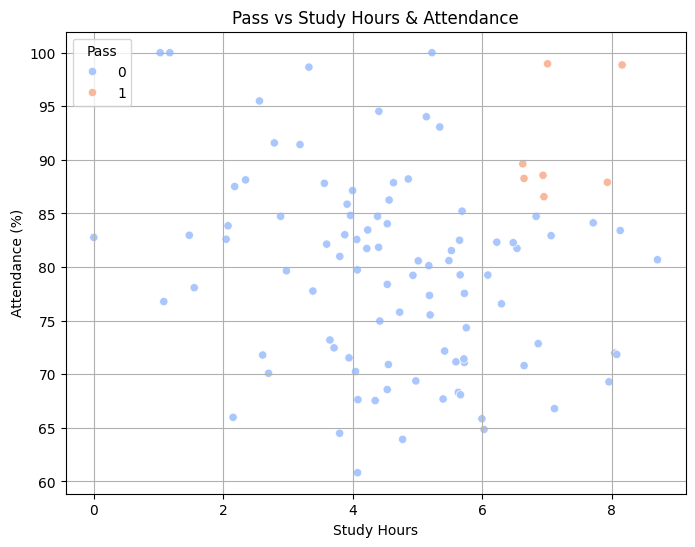

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Study Hours", y="Attendance (%)", hue="Pass", palette="coolwarm")
plt.title("Pass vs Study Hours & Attendance")
plt.grid(True)
plt.show()


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = df[["Study Hours", "Attendance (%)"]]
y = df["Pass"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = LogisticRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

Accuracy: 0.9


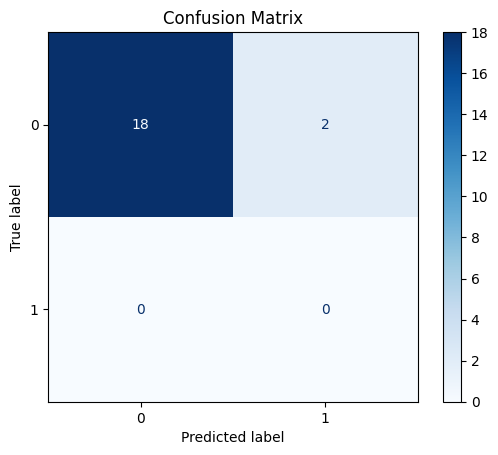

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


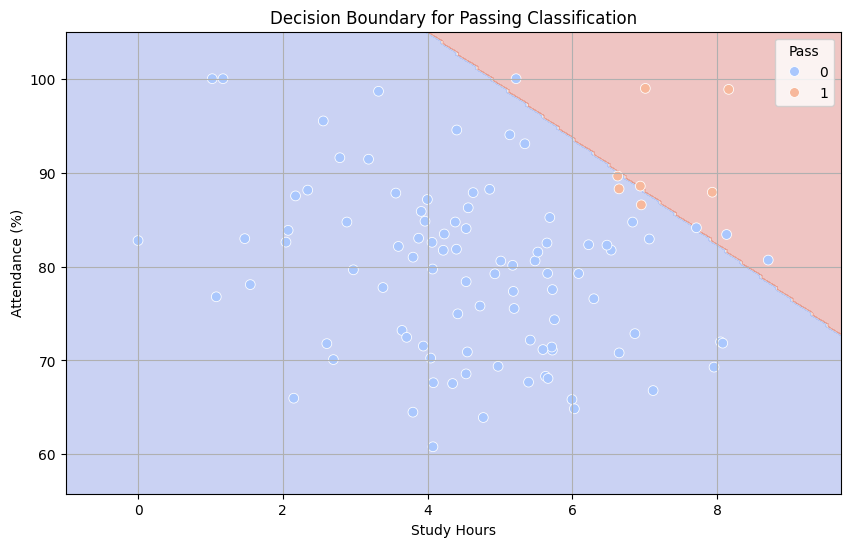

In [21]:
x_min, x_max = X["Study Hours"].min()-1, X["Study Hours"].max()+1
y_min, y_max = X["Attendance (%)"].min()-5, X["Attendance (%)"].max()+5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
sns.scatterplot(x=X["Study Hours"], y=X["Attendance (%)"], hue=y, palette='coolwarm', s=50)
plt.title("Decision Boundary for Passing Classification")
plt.xlabel("Study Hours")
plt.ylabel("Attendance (%)")
plt.grid(True)
plt.show()


# **🎨 Clustering**

**🎯 Goal: Find groups of similar students (unsupervised learning)**

In [22]:
np.random.seed(42)
math_scores = np.random.normal(70, 15, 50).clip(40, 100)
science_scores = np.random.normal(75, 10, 50).clip(50, 100)

students = pd.DataFrame({
    "Maths": math_scores,
    "Science": science_scores
})


In [23]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
students["Cluster"] = kmeans.fit_predict(students)

centroids = kmeans.cluster_centers_


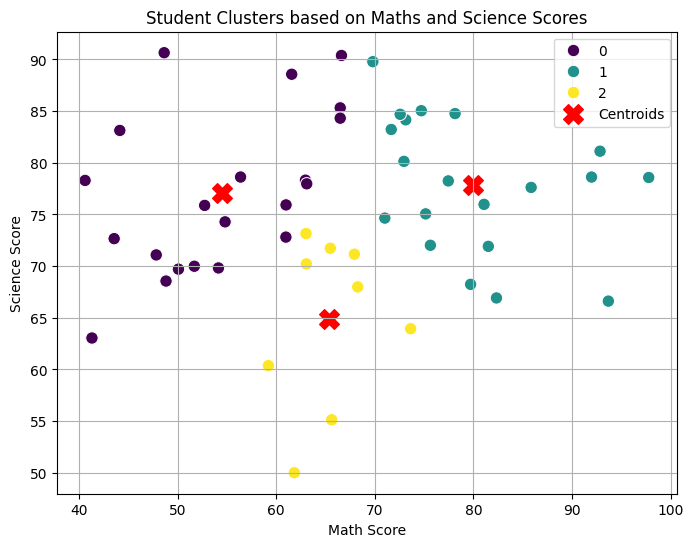

In [24]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=students, x="Maths", y="Science", hue="Cluster", palette="viridis", s=80)
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', label='Centroids', marker='X')
plt.title("Student Clusters based on Maths and Science Scores")
plt.xlabel("Math Score")
plt.ylabel("Science Score")
plt.legend()
plt.grid(True)
plt.show()
